# Taller 2

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller2.ipynb, con el primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en el binder del curso** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 4 de Mayo 11:59 pm**

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.animation as ani
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")

## Problema 1

En el github del curso encontrara un archivo de texto dow.txt. La información contiene el promedio de los precios en el mercado stocks de Estados Unidos de la empresa Dow Jones. \\

Escriba un programa que realice los siguientes pasos:



*    Lea los datos del archivo [dow.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/DataFiles/dow.txt). Use el siguiente comando para leer los datos
```
df = pandas.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/DataFiles/dow.txt")
```
*   Cálcule los coefficientes de la transformada de Fourier.
Asigne los ultimos $95\%$ de los coeficientes iguales a 0 (las frecuencias de menor amplitud). Es decir mantenga los primeros $10\%$ de los coeficientes y asigne el resto de coeficientes iguales a cero.
*   Calcule la transformada inversa de Fourier del arreglo del numeral anterior.
*   Gráfique el arreglo de numpy que resulta de la transformada inversa de Fourier y gráfique los datos originales encima. 

In [3]:
# codigo para leer los datos no modificar

df = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/dow.txt")

data_reshaped = df.to_numpy().reshape(-1,).tolist()

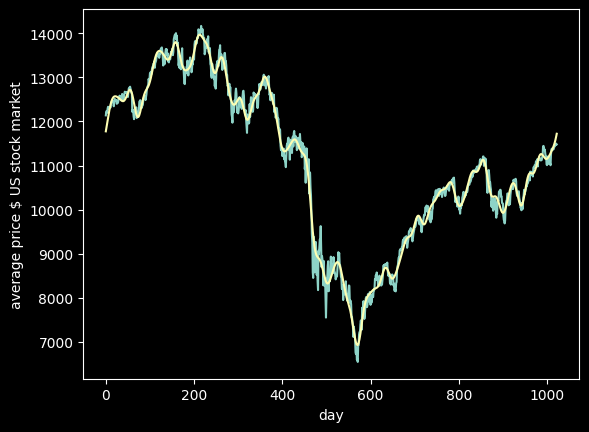

In [15]:
# su codigo aqui

n = len(data_reshaped)
#print(n)
days = lista_enteros = np.arange(n)
#print(days)
X = np.fft.fft(data_reshaped)
#print(X)
amplitudes = np.abs(X)
#num_coeficientes = int(n * 0.1)
num_coeficientes = int(n * 0.05) # 5% 

X_modificado = X.copy()
amplitudes = np.abs(X_modificado)
indices_amplitudes_altas = np.argsort(amplitudes)[-num_coeficientes:]
X_modificado = np.zeros_like(X)
X_modificado[indices_amplitudes_altas] = X[indices_amplitudes_altas]

data_reconstruida = np.fft.ifft(X_modificado)
#print("Señal reconstruida:", data_reconstruida)
data_reconstruida_real = np.real(data_reconstruida)
#print("Señal reconstruida (parte real):", data_reconstruida_real)

fig, ax = plt.subplots()
ax.plot(days, data_reshaped)
ax.plot(days, data_reconstruida_real)
plt.xlabel('day')
plt.ylabel('average price $ US stock market')
plt.show()


## Problema 2

En el github del curso encontrara un archivo de audio Thriller.wav. \\

Para leer el archivo este jupyter notebook debe estar en el directorio **Datafiles** del github. Es decir no modifique la forma de lectura del archivo.

Escriba un programa que realice los siguientes pasos:

*    Para leer los datos del archivo [Thriller.wav](https://github.com/diegour1/MetodosComputacionales2/blob/main/DataFiles/Thriller.wav). Use el siguiente comando para leer los datos
```
sr, x = wavfile.read("Thriller.wav")
```

Para leer el archivo, su notebook debe estar en la carpeta Datafiles en el github del curso.

In [5]:
# No modifique este codigo asi debe poder leerse su programa
sr, x = wavfile.read("Thriller.wav")
print(x[:, 0].shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Thriller.wav'

In [ ]:
# ejemplo para escuchar el audio no modificar
Audio(x[:, 0], rate=44100)

a) Realice un gráfico de las amplitudes de las frecuencias haciendo de la transformada de Fourier del audio.

In [ ]:
# su codigo aqui

data = x[:, 0]
#print(f"data = {data}")


ft_data = np.fft.fft(data)

plt.figure(figsize=(14, 4))
y = (np.abs(ft_data))/len(data)
plt.plot(y)
plt.show()

#plt.figure()
#plt.plot(data[:int(631919/100)],'o')
#plt.show()

b) A partir del audio original elimine las 20000 frecuencias más bajas del audio y reproduzca el audio.

In [ ]:
# su codigo aqui

ft_data_altas = ft_data.copy()

ft_data_altas[:20000] = 0
ft_data_altas[-20000:] = 0
#eliminar frecuencia alta:
#a = 10 # margen
#pico = 8130 # ubicación del pico
#ft_wave[pico-a:pico+a] = 0
#ft_wave[-pico-a:-pico+a] = 0

plt.figure(figsize=(14, 4))
y = (np.abs(ft_data_altas))/len(data)
plt.plot(y)
plt.show()





In [ ]:
# su audio aqui

data_altas = np.fft.ifft(ft_data_altas)
Audio(data_altas.real, rate=44100)

c) A partir del audio original elimine las frecuencias más altas (las complementarias del 20000 más bajas) y reproduzca el audio. 

In [ ]:
#eliminar frecuencia alta:
# su codigo aqui


ft_data_bajas = ft_data.copy()
ft_data_bajas[20000:-20000] = 0


plt.figure(figsize=(14, 4))
y = (np.abs(ft_data_bajas))/len(data)
plt.plot(y)
plt.show()

In [ ]:
# su audio aqui

data_bajas = np.fft.ifft(ft_data_bajas)
Audio(data_bajas.real, rate=44100)

## Problema 3

En este problema vamos a considerar el paquete de onda unidimensional Gaussiano, para una particula libre (potencial $0$), el paquete de onda está dado por, 

$$
  \psi(x, 0) = \Big[\frac{1}{\pi^{1/4}\sqrt{d}}\Big]\exp{\Big[ikx - \frac{x^2}{2d^2}\Big]}
$$

donde consideramos el tiempo igual a $0$. Para todo el ejercicio tome $ħ = 1$.

El paquete de onda se puede interpretar como una función de la posición $x$ tal que $P(x) = \psi(x, 0)\times\psi(x, 0)^*$ corresponde a la densidad de probabilidad de encontrar una particula en la posición $x$, y donde $\psi(x, 0)^*$ es el complejo conjugado de $\psi(x, 0)$.

Considere dos funciones de onda a partir de los archivos, [gauss_wave1.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt) y [gauss_wave2.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt).

Los archivos de las dos ondas se pueden leer con el comando, 

```
wave1 = pandas.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt")
```

Estos datos indican en la primera columna, la posición en $x$ y en la segunda columna el valor real de la función de onda y en la tercera columna el valor imaginario de la función de onda es decir la 2da y 3ra columna guardan $\psi(x)$. En el codigo a continuación se guarda las posiciones en las variables `x1` y `x2`, y las funciones de onda completas con parte real e imaginaria (número complejo) en` psi_x1` y `psi_x2`.



In [6]:
# codigo para leer los datos no modificar

wave1 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt", sep=" ").to_numpy()
wave2 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt", sep=" ").to_numpy()

x1, psi_x1 = wave1[:, 0], wave1[:, 1] + 1j* wave1[:, 2]
x2, psi_x2 = wave2[:, 0], wave2[:, 1] + 1j* wave2[:, 2]

x1.shape, psi_x1.shape, x2.shape, psi_x2.shape

((500,), (500,), (500,), (500,))

a) Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones, es decir, $x_1 \ \text{vs} \ P_1(x_1)$ y $x_2 \ \text{vs} \ P_2(x_2)$.


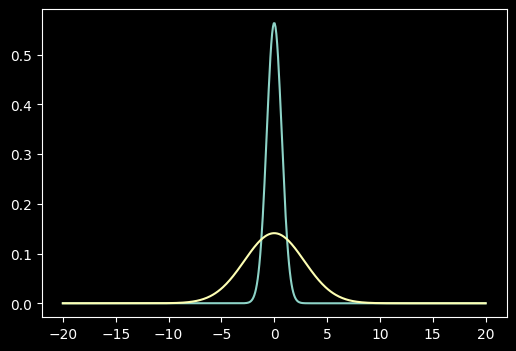

In [7]:
# su codigo aqui

import warnings 
warnings.simplefilter("ignore")

psi_x1_conj = np.conj(psi_x1)
psi_x2_conj = np.conj(psi_x2)

P1 = psi_x1 * psi_x1_conj
P2 = psi_x2 * psi_x2_conj

plt.figure(figsize=(6, 4))
plt.plot(x1, P1)
plt.plot(x2, P2)

b) El espacio de momentos $\phi(p)$ es una función tal que $ \ Q(p) = \phi(p)\times\phi(p)* \ $ corresponde a la probabilidad de que el momentum de una particula sea $p$. El espacio de momentos se puede obtener al realizar la transformada de Fourier del espacio de posiciones, 

$$
  \phi(p) = \frac{1}{\sqrt{2\piħ}}\int{\psi(x)\exp{(\frac{-ipx}{ħ})\,dx}}
$$

Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones de momentos, es decir, $p_1 \ \text{vs} \ Q_1(p_1)$ y $p_2 \ \text{vs} \ Q_2(p_2)$ entre $[-20, 20]$ con 500 puntos en $p$.

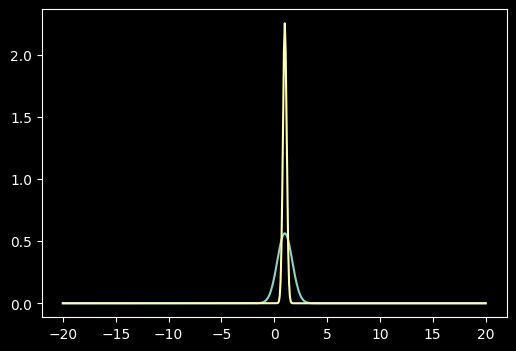

In [12]:

def rectangular_method(f, a, b, n):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        integral += f(a + i * h)
    integral *= h
    return integral

def fourier_transform(psi, x, p):
    ft = np.zeros(len(p), dtype=complex)
    for i, p_val in enumerate(p):
        integrand = lambda x_val: (psi(x_val) * np.exp(-1j * p_val * x_val)) / np.sqrt(2 * np.pi)
        ft[i] = rectangular_method(integrand, x[0], x[-1], len(x))
    return ft


p_vals = np.linspace(-20, 20, 500)
psi_x1_interp = lambda x: np.interp(x, x1, psi_x1)
psi_x2_interp = lambda x: np.interp(x, x2, psi_x2)
phi_p1 = fourier_transform(psi_x1_interp, x1, p_vals)
phi_p2 = fourier_transform(psi_x2_interp, x2, p_vals)
Q1 = phi_p1 * np.conj(phi_p1)
Q2 = phi_p2 * np.conj(phi_p2)

plt.figure(figsize=(6, 4))
plt.plot(p_vals, Q1)
plt.plot(p_vals, Q2)


c) Imprima los dos escalares que corresponden al valor esperado de los momentos para las dos funciones de onda.


In [9]:
### tu codigo aqui

def expected_value(f, x):
    dx = x[1] - x[0]
    return np.sum(f * x) * dx

# Calcular los valores esperados de los momentos para las dos funciones de onda
expected_p1 = expected_value(Q1, p_vals)
expected_p2 = expected_value(Q2, p_vals)

print("Valor esperado del momento para la función de onda 1: {:.4f}".format(expected_p1))
print("Valor esperado del momento para la función de onda 2: {:.4f}".format(expected_p2))

Valor esperado del momento para la función de onda 1: 0.9960
Valor esperado del momento para la función de onda 2: 0.9983


d) Qué significa físicamente la relación entre el ancho de los gráficos de las partes a y b?

Su texto aquí

.

.

.

.

.

.

e) Realice una simulación mostrando la evolución temporal en el espacio de posiciones de la primera ecuación de onda $\psi_1(x)$ entre $[-20, 20]$.

La simulación debe generarse de forma automatica en el jupyter notebook en el binder del curso, y no debe demorar más de 30 segundos en generarse,

Para ello tome los siguientes parametros $t$ entre $[0, 10]$ con 100 puntos, y la simulación con $100$ frames.

Para asegurarse puede subir un link de youtube de su simulación. 

La simulación debería verse parecida al siguiente video.

.

Cambie por su link aquí

https://youtu.be/htkWqg9aG4c

.

.

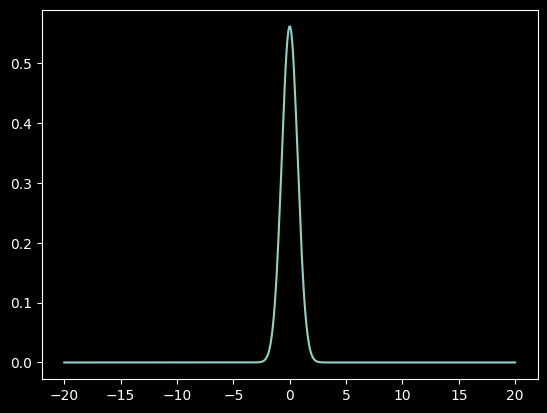

In [11]:
### su codigo aqui

from scipy.integrate import simps

# Parámetros
x_range = (-20, 20)
t_range = (0, 10)
num_x_points = len(x1)
num_t_points = 100
num_frames = 100
p_vals = np.linspace(-20, 20, 500)

# Definir la masa
m = 1

# Obtener phi(p) a partir de los resultados del punto b)
#phi_p1 = np.fft.fft(psi_x1)

# Función para calcular la integral en la definición de psi(x, t)
def psi_integral(x, t, phi_p, p_vals):
    integrand = phi_p * np.exp(1j * (p_vals * x - p_vals**2 * t / 2))
    return simps(integrand, p_vals)

# Evaluar psi(x, t) en los puntos de espacio y tiempo dados
x_vals = np.linspace(x_range[0], x_range[1], num_x_points)
t_vals = np.linspace(t_range[0], t_range[1], num_t_points)

psi_xt = np.array([[psi_integral(x, t, phi_p1, p_vals) / np.sqrt(2 * np.pi) for x in x_vals] for t in t_vals])

# Visualización
fig, ax = plt.subplots()
line, = ax.plot(x_vals, np.abs(psi_xt[0, :])**2)

def update(i):
    line.set_ydata(np.abs(psi_xt[i, :])**2)
    #return line,

ani.FuncAnimation(fig, update, frames=range(num_frames))



[Descargar animación en formato MP4](./animation.mp4)